## Conclusiones
* Fueron usados 7 modelos de regresión (Linear regression, Ridge, Lasso, Elastic Net, Decission Tree, Random Forest, Support Vector Machine) para predecir el precio de los vuelos de clase económica a partir de la aerolínea, la ciudad de salida y de llegada, la hora de salida y llegada, la cantidad de paradas y la duración del vuelo.
* Inicialmente el mejor modelo fue Random Forest con un R2 de 0.727. Este modelo fue ajustado mediante eliminación recursiva de características (RFECV) y GridSearch para mejorar su rendimiento. Luego de eso obtuvo un R2 de 0.74.
* Las características más importantes para predecir el precio de la clase económica son la duración y los días fuera.
## Información adicional
* El Dataset tiene 300153 filas y 19 columnas útiles.
* Las aerolíneas Air India y Vitara tienen los precios promedio más elevados.
* La mayoría de vuelos son entre Mumbai, Delhi y Bangalore
* La aerolínea Vistara realiza el 42.6% del total de vuelos. Pero NO tiene vuelos con hora de salida en la tarde.
* Solo el 0.43% de los vuelos salen tarde en la noche.
* Más del 80% de los vuelos tienen por lo menos una parada.
* En promedio los vuelos más largos son de Kolkata a Chennai. Y los más cortos son de Mumbai y Bangalore a Delhi


### Librerías

In [16]:
import pandas as pd; import seaborn as sns; import matplotlib.pyplot as plt; import numpy as np

### Estilos estéticos

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#-------------------------Estilos para los gráficos. Más info en: https://matplotlib.org/stable/users/explain/customizing.html
plt.style.use("fivethirtyeight") ##Estilo general

##Modificar fuente (texto)
mpl.rcParams["font.size"]=10.5  ##Tamaño de fuente
mpl.rcParams["font.family"]="Times New Roman"     ##Opciones: 'serif' | 'sans-serif' | 'cursive' | 'Times New Roman' | 'monospace'
mpl.rcParams["font.weight"]="normal"  ##Opciones: 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
##Leyenda
mpl.rcParams["legend.fancybox"]=True    ##Caja de la leyenda con esquinas redondeadas
mpl.rcParams["legend.fontsize"]=14  ##Tamaño de fuente de la leyenda
mpl.rcParams["legend.title_fontsize"]=16  ##Tamaño de fuente del titulo de la legenda
##Ticks
mpl.rcParams["xtick.labelsize"]=16
mpl.rcParams["ytick.labelsize"]=14
#Grid
mpl.rcParams["grid.linestyle"]='--'
mpl.rcParams["grid.alpha"]=0.4
mpl.rcParams["grid.color"]='darkgray'
mpl.rcParams["grid.linewidth"]=1.2
##Ejes
mpl.rcParams["axes.facecolor"]="white"
mpl.rcParams["axes.edgecolor"]="0.2"
mpl.rcParams["axes.linewidth"]=1
mpl.rcParams["axes.titleweight"]="normal"
mpl.rcParams["axes.labelsize"]=16
mpl.rcParams["axes.titlesize"]=25
mpl.rcParams["axes.spines.top"]=False
mpl.rcParams["axes.spines.right"]=False
mpl.rcParams["axes.labelweight"]="normal"
##Figura
mpl.rcParams["figure.titleweight"]="normal"
mpl.rcParams["figure.facecolor"]="white"
mpl.rcParams["figure.figsize"]=(12,4)
mpl.rcParams["figure.titlesize"]=16
mpl.rcParams["figure.labelsize"]=16
mpl.rcParams["figure.labelweight"]="bold"

##Paleta de colores propia
from matplotlib.colors import ListedColormap

##Tonos del celeste al mostaza
colores1 = ['#8ecae6','#219ebc','#126782','#023047','#ffb703','#fd9e02','#fb8500']
mapa1 = plt.get_cmap(ListedColormap(colores1))

##Tonos del celeste al mostaza
colores2 = ['#6ff7e8','#62e3dc','#54cfd0','#47bbc5','#3aa6b9','#2c92ad','#1f7ea1']
mapa2 = plt.get_cmap(ListedColormap(colores2))

### Lectura y preprocesamiento

In [18]:
df = pd.read_csv('flight_prediction.csv')


##La columna Unnamed: 0 funciona como un índice. Pero, no será necesaría por lo cual vamos a descartarla.
## La columna flight tiene el código del vuelto. No aporta información relevante

df = df.drop(columns=['Unnamed: 0','flight'])

##Exploración inicial
df.info()
##El dataset NO tiene datos nulos.
print(df.isna().sum())


###Optimización de los datos

types = {'duration':np.float32,
         'days_left':np.int32,
         'price':np.int32
         }
df[list(types.keys())] = df[types.keys()].astype(types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


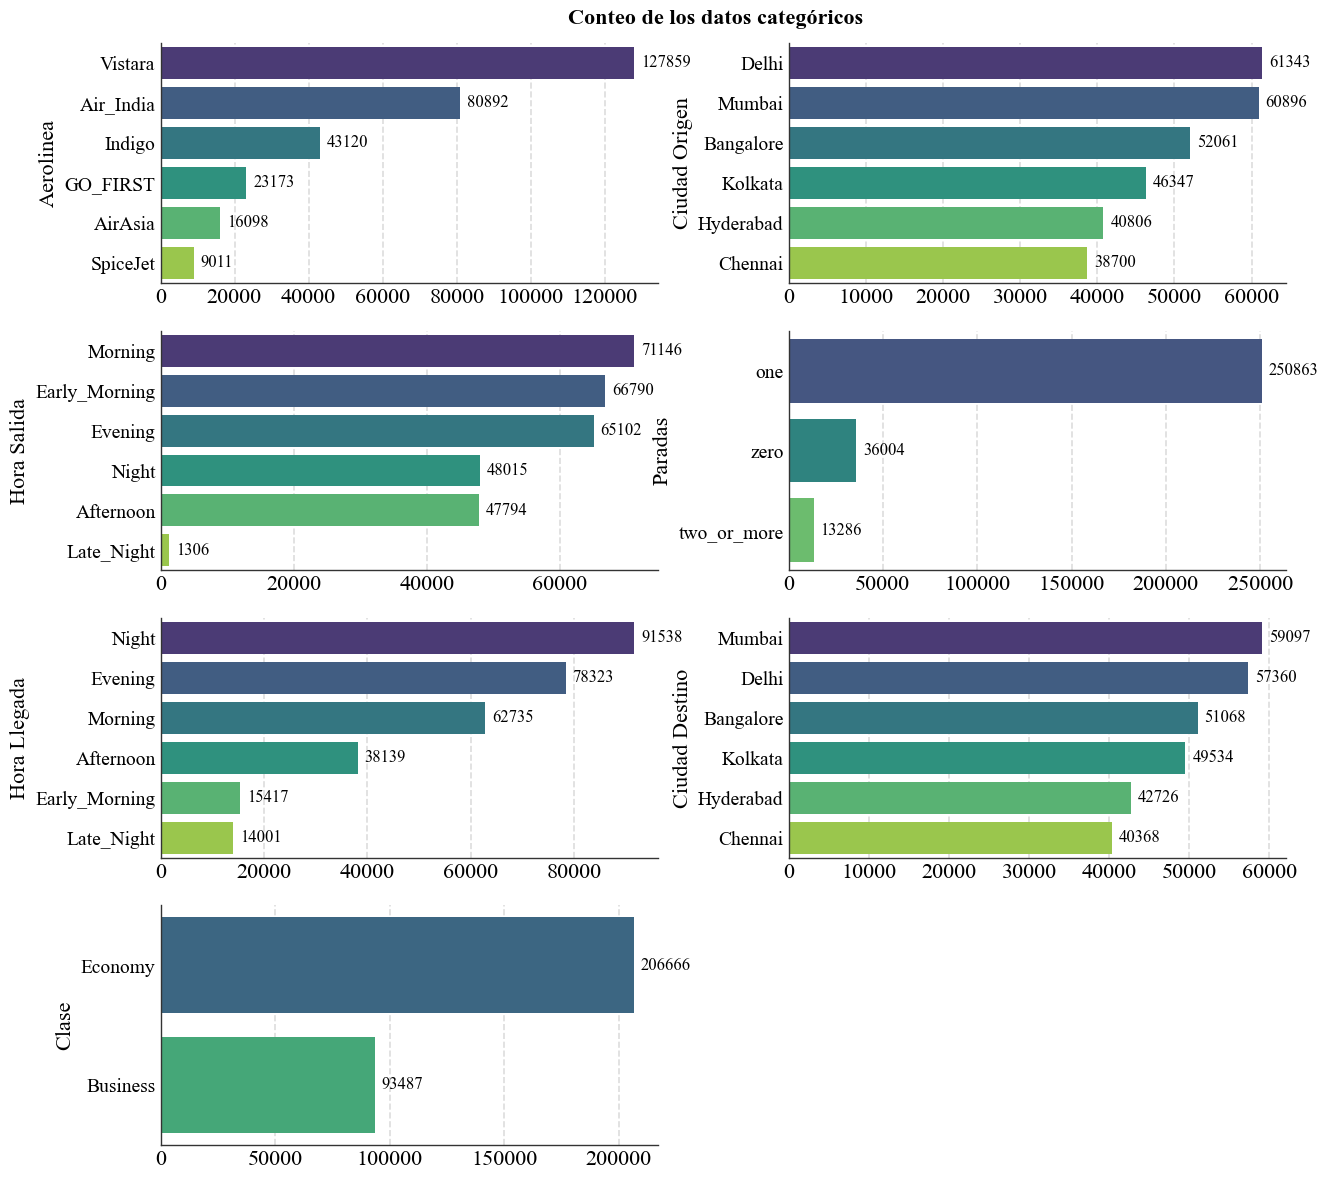

In [19]:
##Renombrar las columnas

columnas = ['aerolinea','ciudad origen','hora salida','paradas','hora llegada','ciudad destino','clase','duracion','dias fuera','precio']

df.columns = columnas
##Visualizar la distribución de las variables categóricas

cat = df.select_dtypes('O')
fig, ax = plt.subplots(figsize=(12,4*3),ncols=2,nrows=4)
fig.suptitle('Conteo de los datos categóricos',fontweight='bold',fontsize=16)
fig.tight_layout(w_pad=6)
ax = ax.flat
for i,col in enumerate(cat):
    conteo = cat[col].value_counts(sort=True,ascending=False).reset_index()
    bar = sns.barplot(data=conteo,y=col,x='count',hue=col,palette='viridis',ax=ax[i])
    for container in bar.containers:
        ax[i].bar_label(container,padding=5,fontsize=12)
    ax[-1].axis(False)
    ax[i].set_ylabel(f'{col.title()}')
    ax[i].set_xlabel('')
    

In [20]:
##verificar la cantidad de valores únicos por columna

for i, col in enumerate(df):
    unicos = df[col].nunique()
    print(f'La columna --> {col} tiene << {unicos} >> valores únicos')


La columna --> aerolinea tiene << 6 >> valores únicos
La columna --> ciudad origen tiene << 6 >> valores únicos
La columna --> hora salida tiene << 6 >> valores únicos
La columna --> paradas tiene << 3 >> valores únicos
La columna --> hora llegada tiene << 6 >> valores únicos
La columna --> ciudad destino tiene << 6 >> valores únicos
La columna --> clase tiene << 2 >> valores únicos
La columna --> duracion tiene << 476 >> valores únicos
La columna --> dias fuera tiene << 49 >> valores únicos
La columna --> precio tiene << 12157 >> valores únicos


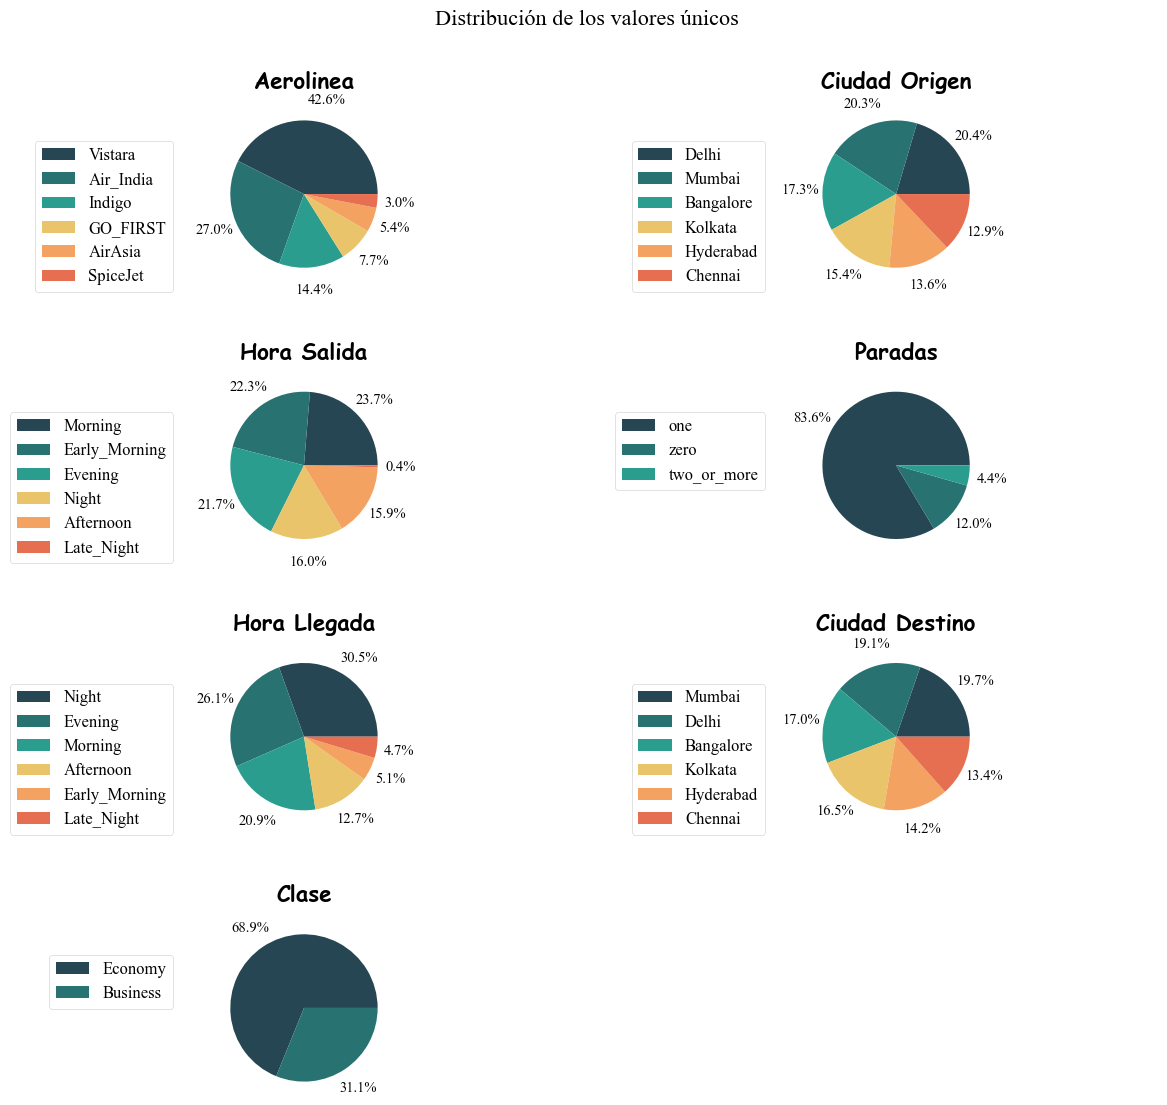

In [21]:
##Visualización de los valores únicos mediante gráfico de pastel

columnas_pie = cat.columns

df_pie = df.loc[:,columnas_pie]

fig, ax = plt.subplots(nrows=df_pie.shape[1]//2+1,ncols=2,figsize=(12, 10))
fig.tight_layout(h_pad=8)
fig.suptitle('Distribución de los valores únicos',y=1.1)
ax = ax.flat
colores = ['#264653','#287271','#2a9d8f','#e9c46a','#f4a261','#e76f51']
for i, col in enumerate(df_pie):
    
    df_pie[col].value_counts().plot(ax=ax[i],kind='pie',autopct='%1.1f%%',radius=1.5,
                                    pctdistance=1.31,labeldistance=None,colors=colores)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col.title().replace('_',' '),fontweight='bold',fontfamily='cursive',fontsize=16,y=1.3)
    ax[i].legend(bbox_to_anchor=(-0.5,1),ncols=1,fontsize=12)
    ax[-1].axis(False)


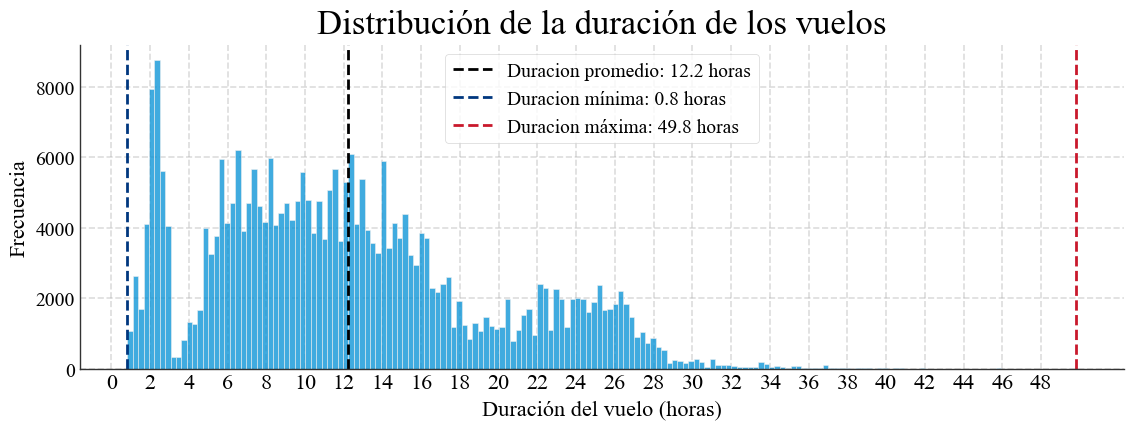

In [22]:
###Distribución de la duración de los vuelos

fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(data=df['duracion'])

ax.set_xlabel('Duración del vuelo (horas)')
ax.set_xticks(np.arange(0,50,2))
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de la duración de los vuelos',y=1.01)
ax.spines[['top','right']].set_visible(False)

mean_duracion = df['duracion'].mean()
min_duracion = df['duracion'].min()
max_duracion = df['duracion'].max()

ax.axvline(mean_duracion,label=f'Duracion promedio: {mean_duracion:.1f} horas',color='k',ls='--',lw=2)
ax.axvline(min_duracion,label=f'Duracion mínima: {min_duracion:.1f} horas',color='#00377e',ls='--',lw=2)
ax.axvline(max_duracion,label=f'Duracion máxima: {max_duracion:.1f} horas',color='#c9182c',ls='--',lw=2)
ax.legend()
plt.show()

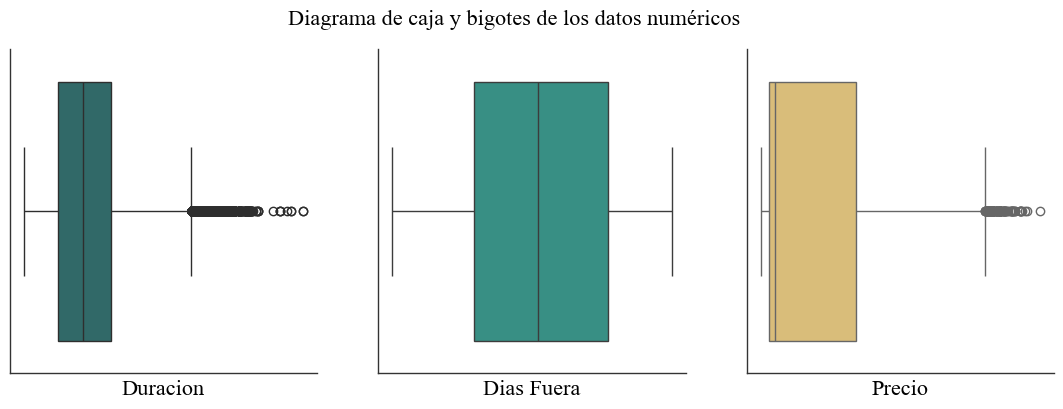

In [23]:
##Verificar valores atípicos

num = df.select_dtypes('number')

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
fig.suptitle('Diagrama de caja y bigotes de los datos numéricos')
ax = ax.flat
for i, col in enumerate(num):
    sns.boxplot(data=df,x=col,ax=ax[i],color=colores[i+1])
    ax[i].set_xlabel(col.title())
    ax[i].set_xticks([])

##La duración y precio tienen una cantidad considerable de valores atípicos.

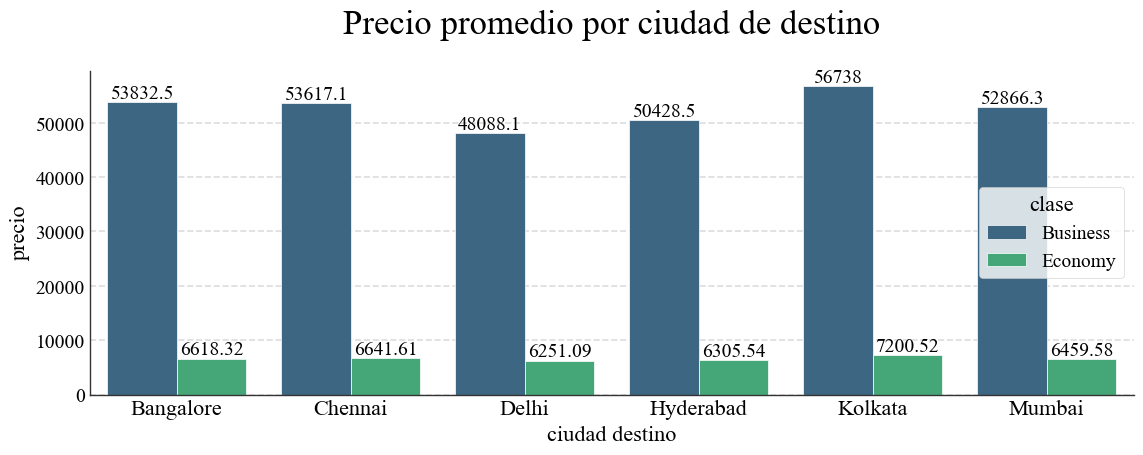

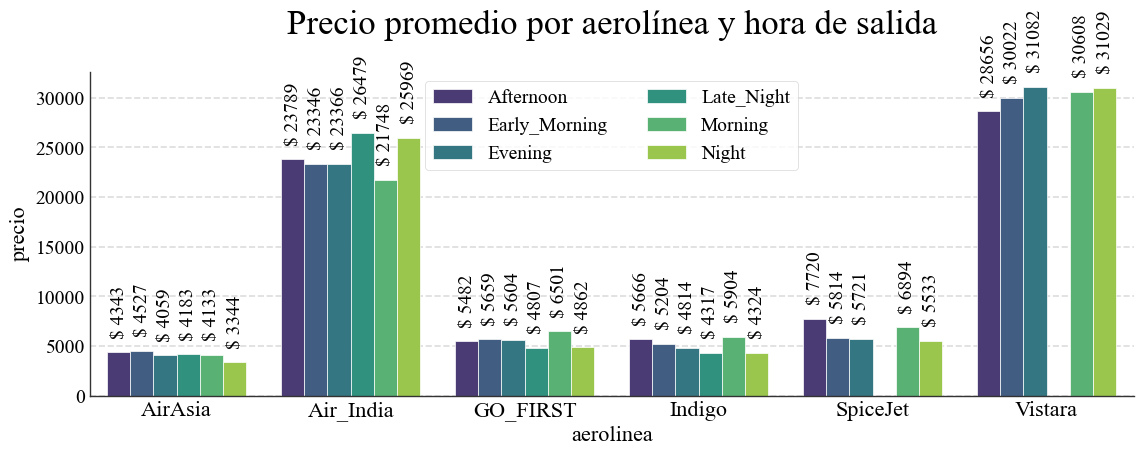

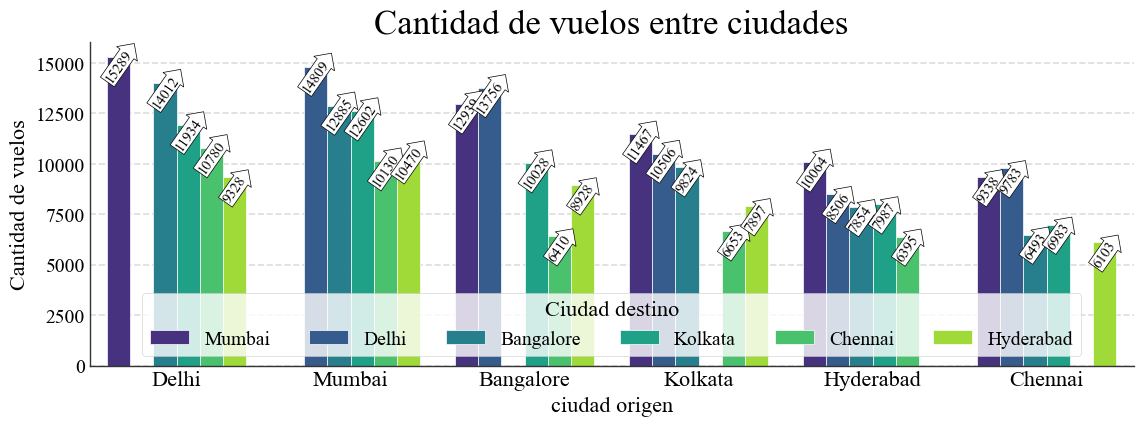

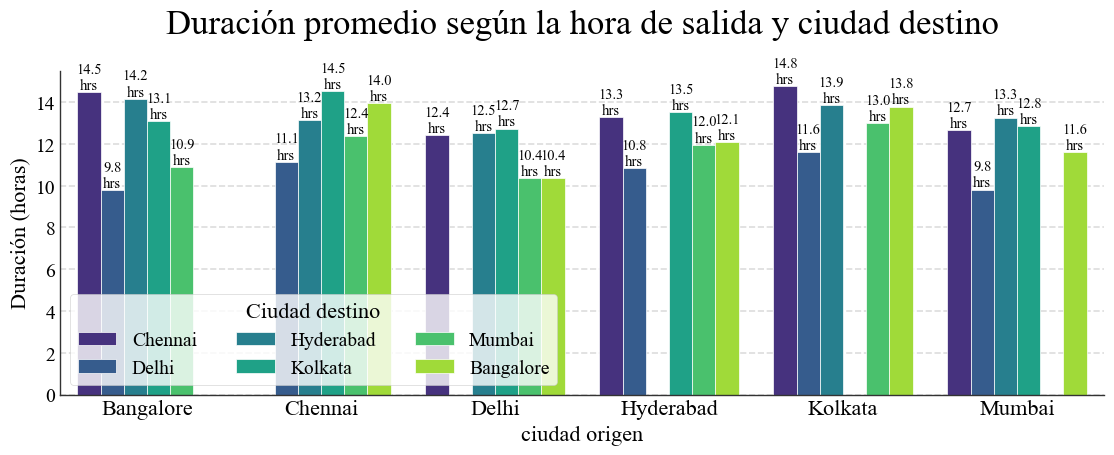

In [24]:
###Obtener información valiosa a partir del precio

##Precio promedio por ciudad destino y separado por clase

fig, ax = plt.subplots()
precio_destino = df.groupby(['ciudad destino','clase'])['precio'].mean().reset_index()
bar = sns.barplot(data=precio_destino,x='ciudad destino',y='precio',hue='clase',palette='viridis',edgecolor='w')
ax.set_title('Precio promedio por ciudad de destino',y=1.09)
for container in bar.containers:
    ax.bar_label(container,fontsize=14)
    
##Precio promedio por aerolinea y hora de salida

precio_aerolinea_horaSalida = df.groupby(['aerolinea','hora salida'])['precio'].mean().reset_index()
fig, ax = plt.subplots()
bar = sns.barplot(data=precio_aerolinea_horaSalida,x='aerolinea',y='precio',hue='hora salida',palette='viridis',
                  edgecolor='w')
ax.set_title('Precio promedio por aerolínea y hora de salida',y=1.09)
ax.legend(ncols=2)
for container in bar.containers:
    ax.bar_label(container,fontsize=14,rotation=90,fmt='$ %.0f',padding=10)

##Conteo de vuelos por ciudad de origen hacia ciudad destino
fig, ax = plt.subplots()
conteo_origen_destino = df.groupby(['ciudad origen',
                                    'ciudad destino'])['precio'].count().reset_index().rename(columns={'precio':'conteo'}).sort_values(by='conteo',ascending=False)

bar = sns.barplot(data=conteo_origen_destino,x='ciudad origen',y='conteo',hue='ciudad destino',palette='viridis',saturation=1,
                  edgecolor='w')
ax.legend(ncols=6,title='Ciudad destino',loc='lower center')
ax.set_title('Cantidad de vuelos entre ciudades')
ax.set_ylabel('Cantidad de vuelos')
for container in bar.containers:
    ax.bar_label(container,rotation=55,padding=-20,bbox={'boxstyle':'rarrow,pad=0.1','edgecolor':'k','facecolor':'w','alpha':1})

##Tiempo promedio segun la ciudad origen y  ciudad de llegada

duracion_horaSalida_ciudadLLegada = df.groupby(['ciudad origen','ciudad destino'])['duracion'].mean().reset_index()
fig, ax = plt.subplots()
bar = sns.barplot(data=duracion_horaSalida_ciudadLLegada,x='ciudad origen',y='duracion',hue='ciudad destino',palette='viridis',saturation=1,
            edgecolor='w')
ax.set_ylabel('Duración (horas)')
ax.set_title('Duración promedio según la hora de salida y ciudad destino',y=1.09)
ax.legend(loc='lower left',ncols=3,title='Ciudad destino')

for container in bar.containers:
    ax.bar_label(container,fmt='%.1f\nhrs')


## Datos para un dashboard en Power BI

In [126]:
##Exportar los datos relacionados a clase económica

eco = df.loc[df['clase']=='Economy'].drop(columns='clase').copy()
eco.to_csv('vuelos_economicos.csv',index=None,decimal=',')

### Proceso de Machine Learning

***Objetivo***: Predecir el precio de los vuelos de clase económica a partir de las demás variables

<Axes: >

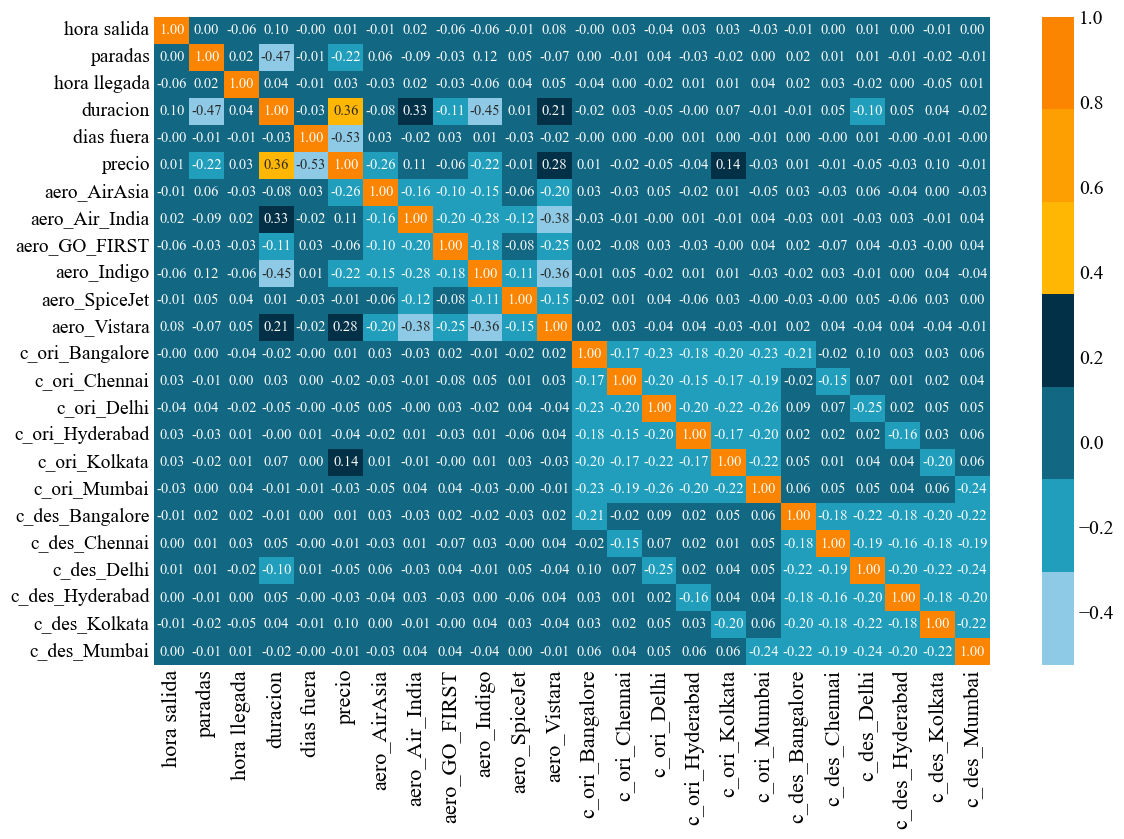

In [ ]:


##Convertir las variables categóricas a numéricas

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()
hot = OneHotEncoder()
columnas_interes = ['hora salida','paradas','hora llegada']
eco_dummie = eco.copy()
for col in columnas_interes:
    eco_dummie[col] = encoder.fit_transform(eco_dummie[col])

##Las columnas aerolinea, ciudad origen y ciudad destino seran transformadas usando onehotencoder para evitar errores de interpretacion.
##Esto se debe a que no deberian ser categorizadas numericamente porque implicitamente se les estaria asignando importancia.

columnas_1hot = ['aerolinea','ciudad origen','ciudad destino']

eco_dummie = pd.get_dummies(data=eco_dummie, columns=columnas_1hot,prefix=['aero','c_ori','c_des'])


##Analizar la correlacion entre variables
corr = eco_dummie.corr(method='spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True,cmap=mapa1,fmt='.2f')

In [70]:
##Vamos a entrenar los modelos con una muestra aleatoria de 10 mil datos para no sobrecargar el computador

df_ml = eco_dummie.sample(10000,ignore_index=True,random_state=123)

x,y = df_ml.drop(columns='precio'),df_ml['precio']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123)

modelos = {
    'Regresion lineal':LinearRegression(),
    'Regresion Ridge':Ridge(),
    'Regresion Lasso':Lasso(),
    'Elastic Net':ElasticNet(),
    'Arbol de decisiones':DecisionTreeRegressor(),
    'Bosque aleatorio':RandomForestRegressor(n_jobs=-1),
    'Vectores de soporte':SVR()
}

r2 = []
rmse = []
for nombre, modelo in modelos.items():
    y_pred = modelo.fit(x_train,y_train).predict(x_test)
    r2.append(round(r2_score(y_test,y_pred),3))
    rmse.append(round(root_mean_squared_error(y_test,y_pred),3))

resultados = pd.DataFrame({'Modelo':list(modelos.keys()),'R2':r2,'RMSE':rmse})
resultados

,Modelo,R2,RMSE
0,Regresion lineal,0.469,2879.355
1,Regresion Ridge,0.469,2879.321
2,Regresion Lasso,0.470,2878.812
3,Elastic Net,0.429,2988.007
4,Arbol de decisiones,0.551,2648.405
5,Bosque aleatorio,0.727,2064.842
6,Vectores de soporte,0.064,3824.809


In [98]:
##validacion de hiperparámetros a Random Forest para reducir el rmse

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

modelo = RandomForestRegressor(n_jobs=-1)

x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=444)
##Usar RFECV para descartar features que NO aportan
seleccion = RFECV(modelo, cv =5,step=0.5,scoring='r2')
seleccion.fit(x_train,y_train)
x_train_nuevo = seleccion.transform(x_train)
x_test_nuevo = seleccion.transform(x_test)

param_grid = {
    'n_estimators': [50, 100, 200,250],
    'max_depth': [3,5,7,9],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features':['sqrt', 'log2', 0.1, 0.5],
}

grilla = GridSearchCV(estimator=modelo, param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='r2')

y_pred = grilla.fit(x_train_nuevo,y_train).predict(x_test_nuevo)

comparacion = pd.DataFrame({'real': y_test, 'predicho':y_pred})
root_mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


(1900.1148913966338, 0.7412956101806867)

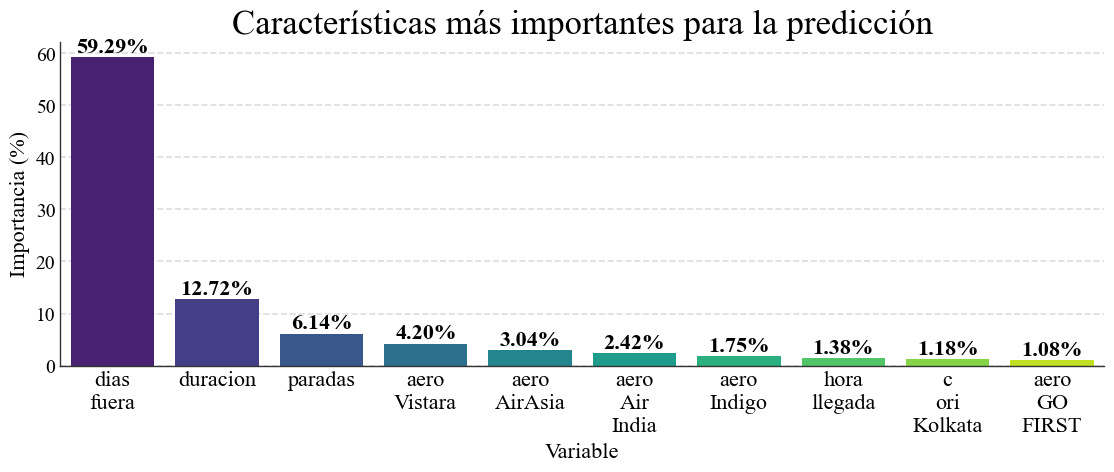

In [125]:
best_estimator = grilla.best_estimator_

importancias = pd.DataFrame({'Variable':seleccion.feature_names_in_,'Importancia (%)':best_estimator.feature_importances_*100})

grafico_importancias = importancias.sort_values(by='Importancia (%)',ascending=False).head(10)

labels = [i.replace('_',' ').replace(' ','\n') for i in grafico_importancias['Variable']]
fig, ax = plt.subplots()
bar = sns.barplot(data=grafico_importancias,x='Variable',y='Importancia (%)',hue='Variable',palette='viridis',saturation=1)
for container in bar.containers:
    ax.bar_label(container,fmt='%.2f%%',fontsize=16,fontweight='bold')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_title('Características más importantes para la predicción')
plt.show()